In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vinothkumar2/ml/main/dt/Heart2.csv")
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [3]:
df.head(14)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0,normal,No
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1,reversable,Yes
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes


In [4]:
df['Thal'] = pd.factorize(df['Thal'])[0].astype(np.int8)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,0,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,1,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,2,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,1,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,1,No


In [5]:
df['ChestPain'] = pd.factorize(df['ChestPain'])[0].astype(np.int8)
df['AHD'] = pd.factorize(df['AHD'])[0].astype(np.int8)

In [6]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0,0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3,1,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0,1,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0,1,0


In [7]:
cols = ['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal','AHD']

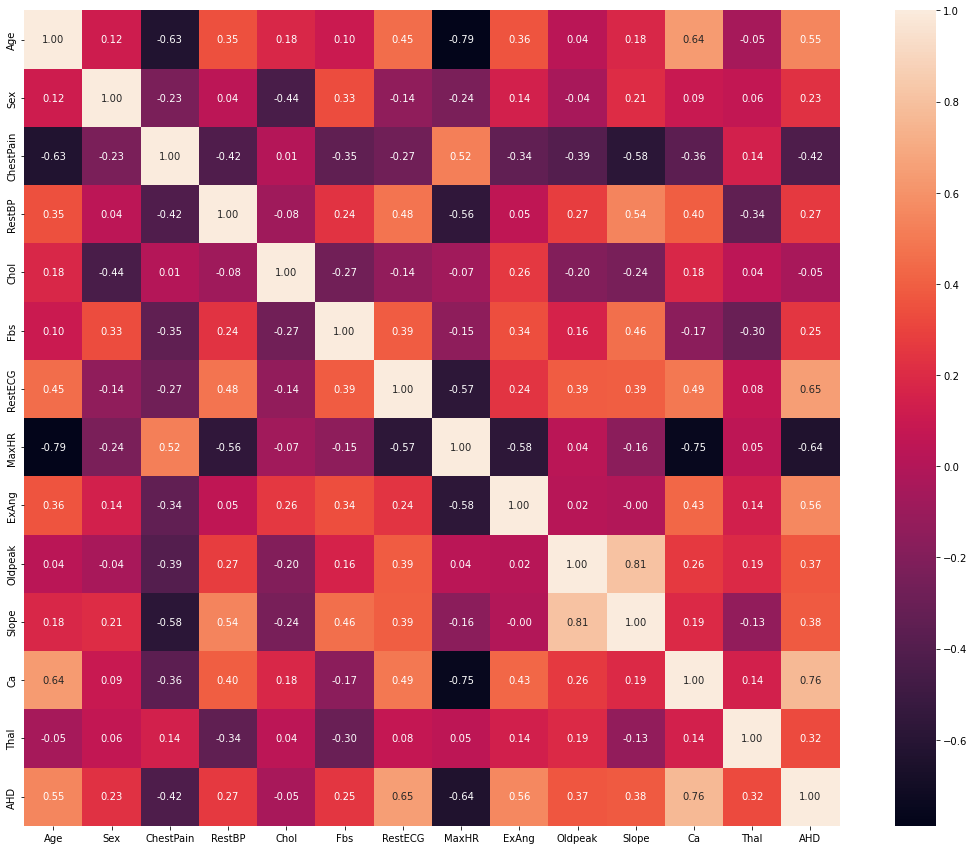

In [8]:
import numpy as np 

plt.subplots(figsize=(20,15))
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [9]:
df.drop(['ChestPain','MaxHR'],axis=1,inplace=True)

In [10]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,145,233,1,2,0,2.3,3,0,0,0
1,67,1,160,286,0,2,1,1.5,2,3,1,1
2,67,1,120,229,0,2,1,2.6,2,2,2,1
3,37,1,130,250,0,0,0,3.5,3,0,1,0
4,41,0,130,204,0,2,0,1.4,1,0,1,0


In [11]:
def inf(p,n):
    diff = -p/14
    diff1 = -n/14
    ans = diff*(math.log(-1*diff)) + diff1*(math.log(diff1*-1))
    return ans

In [12]:
df['AHD'].value_counts()

0    8
1    6
Name: AHD, dtype: int64

In [13]:
inf(8,6)

0.6829081047004717

In [14]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,145,233,1,2,0,2.3,3,0,0,0
1,67,1,160,286,0,2,1,1.5,2,3,1,1
2,67,1,120,229,0,2,1,2.6,2,2,2,1
3,37,1,130,250,0,0,0,3.5,3,0,1,0
4,41,0,130,204,0,2,0,1.4,1,0,1,0


In [15]:
df1 = df[(df['Sex'] == 1) & (df['AHD'] == 1)]
df1['AHD'].value_counts()

1    5
Name: AHD, dtype: int64

In [16]:
df1 = df[(df['Sex'] == 1) & (df['AHD'] == 0)]
df1['AHD'].value_counts()

0    5
Name: AHD, dtype: int64

In [17]:
df['Slope'] = [0 if x == 1 else 1 if x == 2 else 2 for x in df['Slope']]
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,145,233,1,2,0,2.3,2,0,0,0
1,67,1,160,286,0,2,1,1.5,1,3,1,1
2,67,1,120,229,0,2,1,2.6,1,2,2,1
3,37,1,130,250,0,0,0,3.5,2,0,1,0
4,41,0,130,204,0,2,0,1.4,0,0,1,0


In [18]:
def info_col(col_name,n):
    l = []
    for i in range(0,n):
        df1 = df[(df[col_name] == i) & (df['AHD'] == 1)]
        if df1.empty:
            l.append(0)
        else:
            l.append(int(df1['AHD'].value_counts()))
        df1 = df[(df[col_name] == i) & (df['AHD'] == 0)]
        if df1.empty:
            l.append(0)
        else :
            l.append(int(df1['AHD'].value_counts()))
    j = 0
    s = 0
    while j < len(l):
        if l[j]>0 and l[j+1]>0:
            s = s + ((l[j]+l[j+1])/14)*inf(int(l[j]),int(l[j+1]))
        j += 2
    return s

In [19]:
info_col('Sex',2)

0.673487303713993

In [20]:
info_col('Fbs',2)

0.6535027367351511

In [21]:
info_col('ExAng',2)

0.5966591891645707

In [22]:
info_col('Thal',3)

0.5709878794955071

In [23]:
info_col('Ca',4)

0.3267543504994274

In [24]:
info_col('Slope',3)

0.4313867113134571